**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Prepare

**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
TXT_FNAME_ANNOT = "region.annotation.encode_e2g_benchmark.tsv"

**View files**

In [4]:
txt_fdiry = file.path(FD_RES, "region_annotation", "*", "summary")
txt_fname = TXT_FNAME_ANNOT
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.encode_e2g_benchmark.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_union/summary/region.annotation.encode_e2g_benchmark.tsv 


## Import data

**Read region annotation**

In [5]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname = TXT_FNAME_ANNOT
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = VEC_TXT_FOLDER

### assign and show
lst_dat_region_annot_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 8770   12

$fcc_astarr_macs_input_union
[1] 9229   12



Chrom,ChromStart,ChromEnd,Region,Group,Label,Target,Score,Zcore,NLog10P,Regulated,Source
chr1,3774056,3776283,chr1:3774056-3776283,E2G-Benchmark,Regulated:TRUE,CEP104,-0.2934319,-4.705144,2.395344,TRUE,Ulirsch2016
chr1,3774056,3776283,chr1:3774056-3776283,E2G-Benchmark,Regulated:TRUE,LRRC47,-0.3311781,-5.331209,2.109514,TRUE,Ulirsch2016
chr1,3774056,3776283,chr1:3774056-3776283,E2G-Benchmark,Regulated:TRUE,SMIM1,-0.4720192,-7.667223,3.192703,TRUE,Ulirsch2016


**Explore: Score**

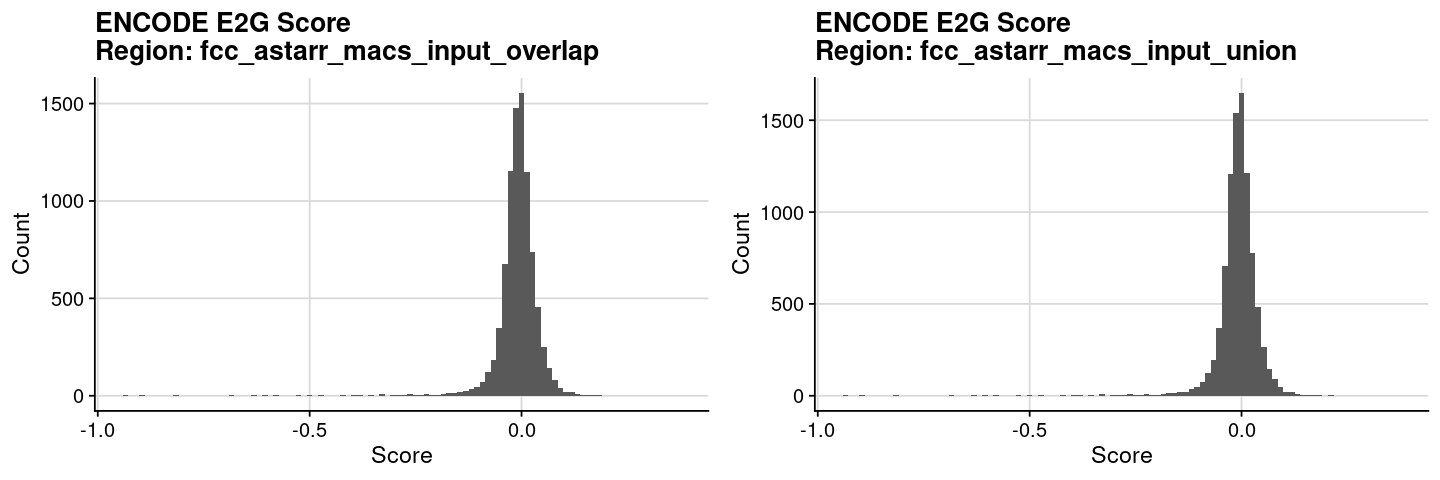

In [6]:
lst = lst_dat_region_annot_import
lst = lapply(names(lst), function(idx){
    txt = paste0("ENCODE E2G Score", "\n", "Region: ", idx)
    dat = lst[[idx]]
    gpt = ggplot(dat, aes(x=Score)) + 
        geom_histogram(bins = 100) + 
        theme_cowplot() +
        background_grid() +
        labs(x = "Score", y = "Count", title = txt)
    return(gpt)
})
options(repr.plot.height=4, repr.plot.width=12)
plot_grid(plotlist = lst, nrow=1)

**Explore: Zcore**

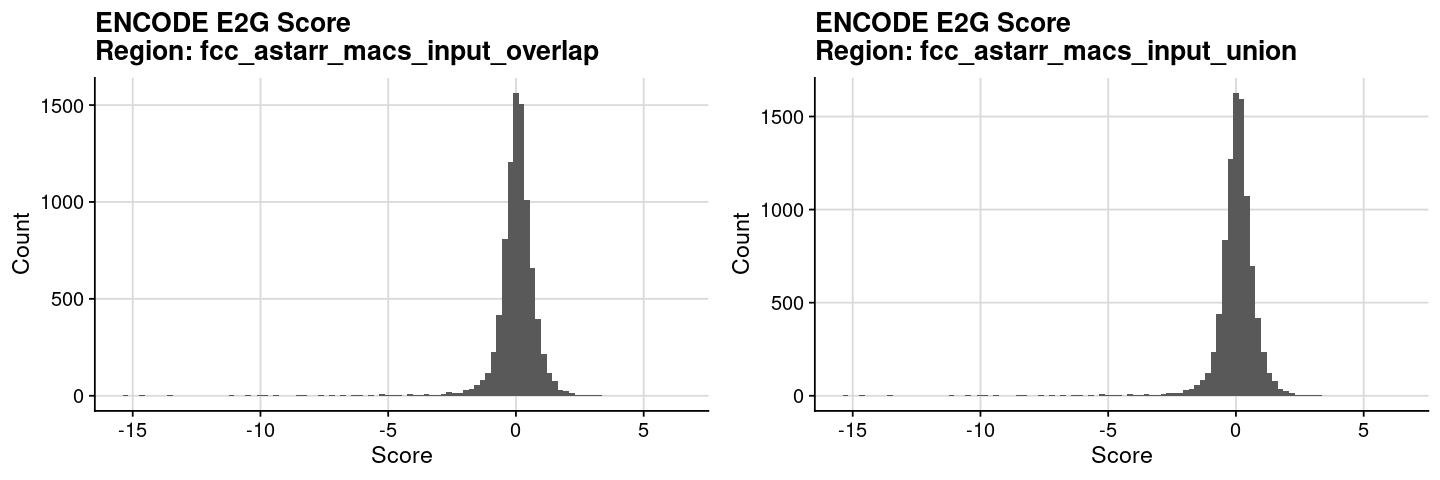

In [7]:
lst = lst_dat_region_annot_import
lst = lapply(names(lst), function(idx){
    txt = paste0("ENCODE E2G Score", "\n", "Region: ", idx)
    dat = lst[[idx]]
    gpt = ggplot(dat, aes(x=Zcore)) + 
        geom_histogram(bins = 100) + 
        theme_cowplot() +
        background_grid() +
        labs(x = "Score", y = "Count", title = txt)
    return(gpt)
})
options(repr.plot.height=4, repr.plot.width=12)
plot_grid(plotlist = lst, nrow=1)

## Arrange table

In [8]:
lst = lst_dat_region_annot_import
lst = lapply(lst, function(dat){
    ### set score and sign
    dat = dat %>% 
        dplyr::mutate(Score = Zcore) %>%
        dplyr::mutate(Sign  = ifelse(Score > 0, "pos", "neg"))

    ### select the columns
    dat = dat %>%
        dplyr::select(Chrom, ChromStart, ChromEnd, Region, Score, Target, Sign) %>%
        dplyr::distinct()
    return(dat)
})

### assign and show
lst_dat_region_score_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 8770    7

$fcc_astarr_macs_input_union
[1] 9229    7



Chrom,ChromStart,ChromEnd,Region,Score,Target,Sign
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chr1,3774056,3776283,chr1:3774056-3776283,-4.705144,CEP104,neg
chr1,3774056,3776283,chr1:3774056-3776283,-5.331209,LRRC47,neg
chr1,3774056,3776283,chr1:3774056-3776283,-7.667223,SMIM1,neg


## Summarize scores by target

In [9]:
lst = lst_dat_region_score_arrange
lst = lapply(lst, function(dat){
    ### summarize scores by each target
    dat_summary_total = dat %>%
        dplyr::group_by(Chrom, ChromStart, ChromEnd, Region, Target) %>%
        dplyr::summarise(
            Mean    = mean(Score),
            Median  = median(Score),
            Max     = max(Score),
            Min     = min(Score),
            Count   = n(),
            .groups = "drop"
        )
    
    ### summarize scores by sign (direction)
    dat_summary_sign = dat %>%
        dplyr::group_by(Chrom, ChromStart, ChromEnd, Region, Target, Sign) %>%
        dplyr::summarise(Mean = mean(Score), .groups = "drop") %>% 
        dplyr::mutate(Sign = dplyr::recode(Sign, `pos` = "Mean_Pos", `neg` = "Mean_Neg")) %>% 
        tidyr::spread(Sign, Mean)
    
    ### merge the results
    vec = c("Chrom", "ChromStart", "ChromEnd", "Region", "Target")
    dat = dplyr::left_join(
        dat_summary_total,
        dat_summary_sign,
        by = vec) %>% 
        replace(is.na(.), 0)
    return(dat)
})

### assign and show
lst_dat_region_score_by_target = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 8299   12

$fcc_astarr_macs_input_union
[1] 8640   12



Chrom,ChromStart,ChromEnd,Region,Target,Mean,Median,Max,Min,Count,Mean_Neg,Mean_Pos
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
chr1,3774056,3776283,chr1:3774056-3776283,CEP104,-4.705144,-4.705144,-4.705144,-4.705144,1,-4.705144,0
chr1,3774056,3776283,chr1:3774056-3776283,LRRC47,-5.331209,-5.331209,-5.331209,-5.331209,1,-5.331209,0
chr1,3774056,3776283,chr1:3774056-3776283,SMIM1,-7.667223,-7.667223,-7.667223,-7.667223,1,-7.667223,0


## Futher summarize scores across different targets

In [10]:
lst = lst_dat_region_score_by_target
lst = lapply(lst, function(dat){
    ### summarize mean(scores) across different targets
    dat = dat %>% 
        dplyr::group_by(Chrom, ChromStart, ChromEnd, Region) %>%
        dplyr::summarize(
            Mean_Tot = mean(Mean),
            Mean_Pos = max(Mean, 0),
            Mean_Neg = min(Mean, 0),
            Count    = sum(Count),
            Note     = paste(Target, Count, sep=":", collapse="|"),
            .groups  = "drop"
        ) %>%
        dplyr::rename("Mean" = "Mean_Tot")
    return(dat)
})

### assign and show
lst_dat_region_score_merge = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 3035    9

$fcc_astarr_macs_input_union
[1] 3169    9



Chrom,ChromStart,ChromEnd,Region,Mean,Mean_Pos,Mean_Neg,Count,Note
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>
chr1,3774056,3776283,chr1:3774056-3776283,-5.9011920,0.0000000,-7.667223,3,CEP104:3|LRRC47:3|SMIM1:3
chr1,3803955,3806146,chr1:3803955-3806146,0.3625040,0.5876462,0.000000,2,LRRC47:2|SMIM1:2
chr1,4126841,4128109,chr1:4126841-4128109,0.5496118,0.5496118,0.000000,1,SMIM1:1


**Explore: Count**

In [11]:
lst = lst_dat_region_score_merge
lst = lapply(lst, function(dat){
    res = table(dat$Count, dnn = "Count")
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Folder")
dat = dat %>% tidyr::spread(Folder, Freq)
fun_display_table(dat)

Count,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
1,1345,1399
2,529,555
3,306,310
4,309,326
5,165,176
6,133,138
7,44,45
8,42,46
9,16,20
10,30,29


**Explore: Score**

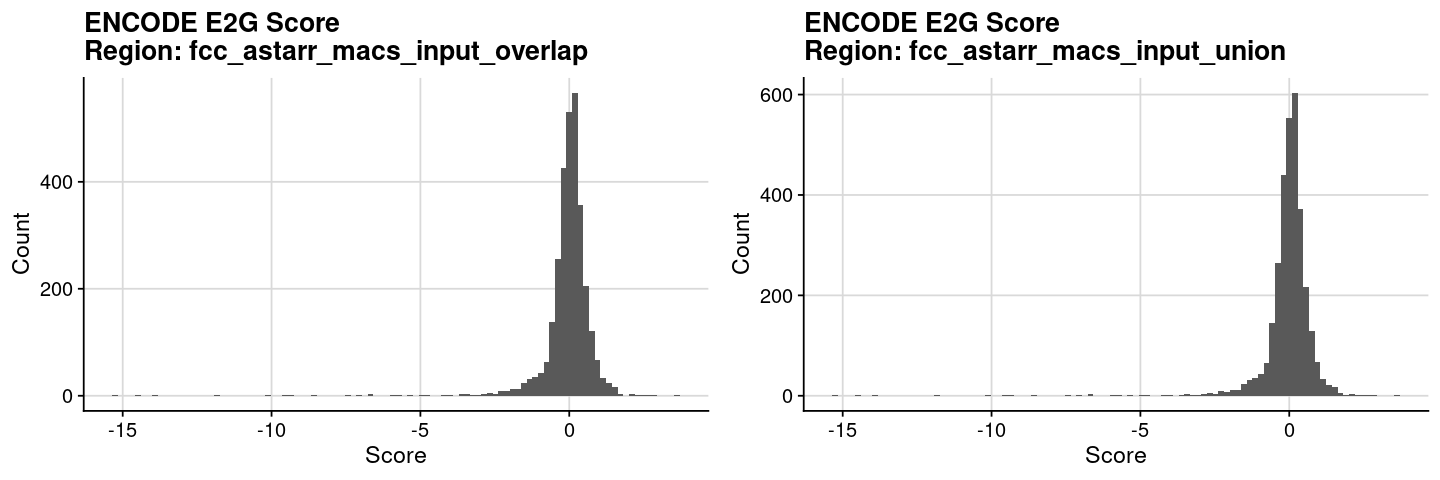

In [12]:
lst = lst_dat_region_score_merge
lst = lapply(names(lst), function(idx){
    txt = paste0("ENCODE E2G Score", "\n", "Region: ", idx)
    dat = lst[[idx]]
    gpt = ggplot(dat, aes(x=Mean)) + 
        geom_histogram(bins = 100) + 
        theme_cowplot() +
        background_grid() +
        labs(x = "Score", y = "Count", title = txt)
    return(gpt)
})
options(repr.plot.height=4, repr.plot.width=12)
plot_grid(plotlist = lst, nrow=1)

## Export

In [13]:
for (txt_folder in VEC_TXT_FOLDER){

    ### get tables
    dat_region_score_target = lst_dat_region_score_by_target[[txt_folder]]
    dat_region_score_merge  = lst_dat_region_score_merge[[txt_folder]]
    
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, 
        "region_annotation", 
        txt_folder,
        "summary"
    )
    
    ### write table (summarize by target)
    txt_fname = "region.annotation.encode_e2g_benchmark.score.target.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)
    
    dat = dat_region_score_target
    dat = dat %>% dplyr::arrange(Chrom, ChromStart, ChromEnd)
    write_tsv(dat, txt_fpath)

    ### write table (average across targets)
    txt_fname = "region.annotation.encode_e2g_benchmark.score.merge.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)
    
    dat = dat_region_score_merge
    dat = dat %>% dplyr::arrange(Chrom, ChromStart, ChromEnd)
    write_tsv(dat, txt_fpath)
}